# Skin Cancer Classification

### The dataset is taken from kaggle
### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

### Importing the data

In [2]:
raw_data = pd.read_csv("hmnist_28_28_RGB.csv")
raw_data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


### Creating a checkpoint

In [3]:
data = raw_data.copy()

### Data Preprocessing

In [4]:
data.isna().sum().sum()

0

No Missing Values

In [5]:
data['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [6]:
label_map = { 0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'nv', 5: 'vasc', 6: 'mel'}

In [7]:
X = np.array(data.iloc[:, :-1]).reshape((data.shape[0], 28, 28, 3))
X = X/255
y = np.array(data['label'])

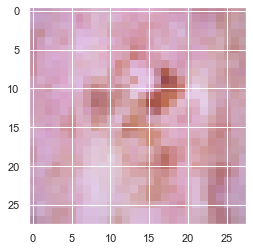

In [8]:
fig0 = plt.figure()
plt.imshow(X[0])
plt.show()

Let's split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

### Defining a Convolutional Neural Network Model for classification

In [10]:
inputs = tf.keras.Input(shape = X_train[0].shape)

x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = 'relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
output = Dense(7, activation = 'softmax')(x)

model = Model(inputs, output)

model.compile(optimizer = RMSprop(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs = {}):
        if logs.get('accuracy') is not None:
            if logs.get('accuracy') > 0.95:
                print(r'Got 95% accuracy!! Stopping training!!')
                self.model.stop_training = True

Training the model

In [12]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1, batch_size = 64, verbose = 1, callbacks = [mycallback()])
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/20
127/127 [==============================] - 6s 12ms/step - loss: 1.0843 - accuracy: 0.6664 - val_loss: 0.9945 - val_accuracy: 0.6796
Epoch 2/20
127/127 [==============================] - 1s 9ms/step - loss: 0.9543 - accuracy: 0.6718 - val_loss: 0.9018 - val_accuracy: 0.6885
Epoch 3/20
127/127 [==============================] - 1s 9ms/step - loss: 0.8963 - accuracy: 0.6844 - val_loss: 0.8605 - val_accuracy: 0.6807
Epoch 4/20
127/127 [==============================] - 1s 10ms/step - loss: 0.8649 - accuracy: 0.6931 - val_loss: 0.9230 - val_accuracy: 0.6951
Epoch 5/20
127/127 [==============================] - 1s 9ms/step - loss: 0.8272 - accuracy: 0.7027 - val_loss: 0.7983 - val_accuracy: 0.7106
Epoch 6/20
127/127 [==============================] - 1s 9ms/step - loss: 0.7964 - accuracy: 0.7090 - val_loss: 0.7820 - val_accuracy: 0.7295
Epoch 7/20
127/127 [==============================] - 1s 11ms/step - loss: 0.7628 - accuracy: 0.7204 - val_loss: 0.7771 - val_accuracy: 0.7118
Epo

In [13]:
test_results = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.7585


In [14]:
print(f'Test Loss: {test_results[0]}')
print(f'Test Accuracy: {test_results[1]}')

Test Loss: 0.6968883872032166
Test Accuracy: 0.7584830522537231


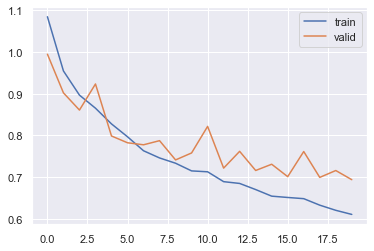

In [15]:
plt.figure()
plt.plot(hist['loss'])
plt.plot(hist['val_loss'],)
plt.legend(("train" , "valid") , loc =0)
plt.show()

In [16]:
y_pred = model.predict(X_test)

In [17]:
pred_labels = np.argmax(y_pred, axis = -1)
pred_labels = [label_map[i] for i in pred_labels]
pred_labels[:5]

['nv', 'nv', 'nv', 'mel', 'nv']

In [18]:
test_labels = [label_map[i] for i in y_test]
test_labels[:5]

['mel', 'nv', 'mel', 'mel', 'nv']

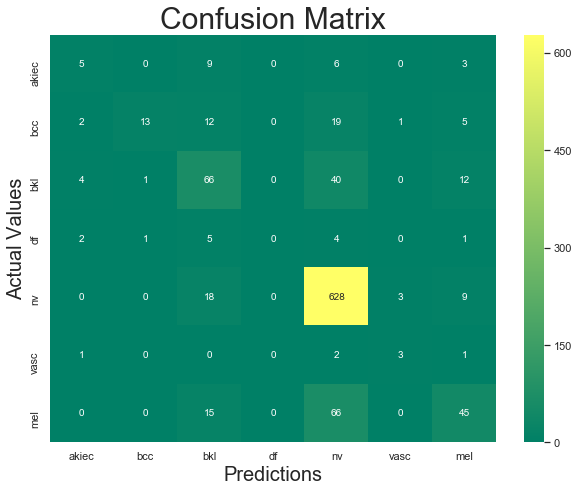

In [19]:
from sklearn.metrics import confusion_matrix
fig1 = plt.figure(figsize = (10, 7.5))
labels = list(label_map.values())
sns.heatmap(confusion_matrix(test_labels, pred_labels, labels = labels), cmap = 'summer', annot = True, fmt = 'd',
                                xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix', fontsize = 30)
plt.xlabel('Predictions', fontsize = 20)
plt.ylabel('Actual Values', fontsize = 20)
plt.show()

The model doesn't seem to do well in classifying 'df' and 'vasc'. This may be due to the small amount of data we provided for it